In [2]:
import util
import numpy as np
%matplotlib inline

In [4]:
folder_path = "../data/language_data/"
langs = {}
for i in range(2008, 2019):
    vals = util.read_2D_values(folder_path + str(i) + ".csv")
    vals = vals[1:]
    for j in range(0, len(vals)):
        if vals[j][0] not in  langs.keys():
            langs[vals[j][0]] = {}
        langs[vals[j][0]][i] = vals[j][1]

# print( langs )
for lang in langs:
    temp = []
    for i in range(2008, 2019):
        if i in langs[lang].keys():
            temp.append( langs[lang][i] )
        else:
            temp.append( 0 )
    langs[lang] = temp

print( langs["Shell"] )

['48747', '67843', '90810', '116936', '154389', '210407', '283804', '352882', '235482', '194244', '76870']


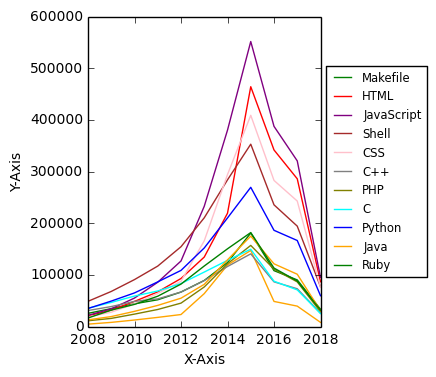

In [75]:
X_range = np.array( range(2008, 2019) )
plots = []
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
counter = 1
for lang in langs:
    langs[lang] = np.array( langs[lang] ).astype(np.float)
    if util.getMax( langs[lang] ) > 120000:
        plots.append( util.getYPlotObj(langs[lang], "line", label=lang, color=colors[counter%len(colors)]) )
        counter += 1
    else:
        pass
#         plots.append( util.getYPlotObj(langs[lang], "line", color=colors[counter%len(colors)]) )
util.plot_graph(X_range, plots, showLegend=True)

langs_sum = langs

In [76]:
total = np.zeros( len(langs["Java"]) )
for lang in langs:
    for i in range(0, len(langs["Java"])):
        total[i] += langs[lang][i]

for lang in langs:
    for i in range(0, len(langs["Java"])):
        langs[lang][i] = langs[lang][i] / total[i] * 100

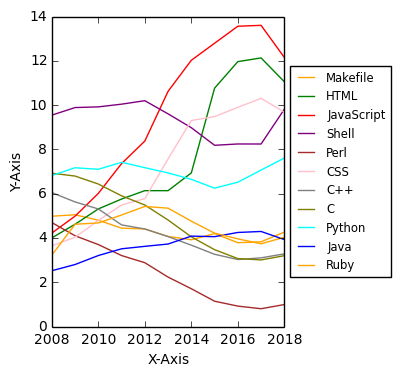

In [77]:
plots = []
counter = 1
for lang in langs:
    if util.getMax( langs[lang] ) > 4:
        plots.append( util.getYPlotObj(langs[lang], "line", label=lang, color=colors[counter%len(colors)]) )
        counter += 1
util.plot_graph(X_range, plots, showLegend=True)

In [78]:
langs_pop = langs_sum
for lang in langs_pop:
    for i in range(1, len(langs_pop["Java"])):
        langs_pop[lang][i] += langs_pop[lang][i-1]

total = np.zeros( len(langs_pop["Java"]) )
for lang in langs_pop:
    for i in range(0, len(langs_pop["Java"])):
        total[i] += langs_pop[lang][i]

for lang in langs_pop:
    for i in range(0, len(langs_pop["Java"])):
        langs_pop[lang][i] = langs_pop[lang][i] / total[i] * 100

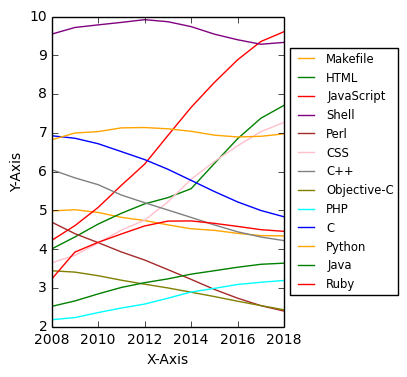

In [79]:
plots = []
counter = 1
for lang in langs_pop:
    if util.getMax( langs_pop[lang] ) > 3:
        plots.append( util.getYPlotObj(langs_pop[lang], "line", label=lang, color=colors[counter%len(colors)]) )
        counter += 1
util.plot_graph(X_range, plots, showLegend=True)

In [138]:
[average_error, errors, predictions] = util.make_predictions(    
                                                            langs["JavaScript"],
                                                            method="ewma",
                                                            ewma_factor=0.8,
                                                            season_factor=144,
                                                            ar_factor=2,
                                                            test_start_idx=1
                                                        )
print( len(predictions) )
pre = langs["JavaScript"][0]
predictions = [pre] + predictions
print( len(predictions) )

('average_error=', 0.3238728875918552)
10
11


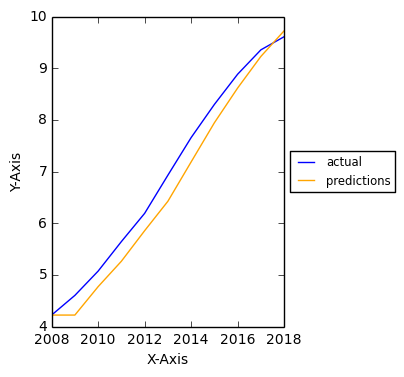

In [141]:
plots = []
counter = 1
plots.append( util.getYPlotObj(langs["JavaScript"], "line", label="actual", color=colors[0]) )
plots.append( util.getYPlotObj(predictions, "line", label="predictions", color=colors[1]) )
util.plot_graph(X_range, plots, showLegend=True)

In [142]:
[average_error, errors, predictions] = util.make_predictions(    
                                                            langs_pop["JavaScript"],
                                                            method="ewma",
                                                            ewma_factor=0.8,
                                                            season_factor=144,
                                                            ar_factor=2,
                                                            test_start_idx=1
                                                        )
print( len(predictions) )
pre = langs_pop["JavaScript"][0]
predictions = [pre] + predictions
print( len(predictions) )

('average_error=', 0.3238728875918552)
10
11


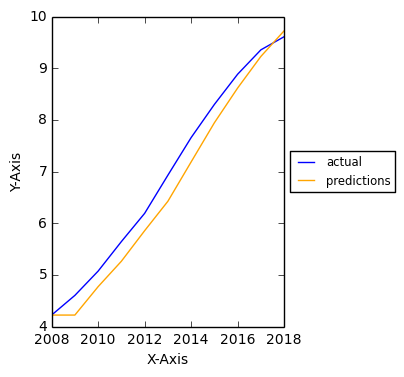

In [143]:
plots = []
counter = 1
plots.append( util.getYPlotObj(langs_pop["JavaScript"], "line", label="actual", color=colors[0]) )
plots.append( util.getYPlotObj(predictions, "line", label="predictions", color=colors[1]) )
util.plot_graph(X_range, plots, showLegend=True)